In [8]:
import os

# Define the Spark version
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION'] = spark_version

# Install Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# Download and extract Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Install Findspark and PySpark
!pip install -q findspark pyspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Initialize Findspark
import findspark
findspark.init()

# Start a SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('example').getOrCreate()

# Print Spark version to verify installation
print(f"Spark version: {spark.version}")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,218 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe a

In [10]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Card Data 2023") \
    .getOrCreate()

# Verify the Spark session
print("Spark version:", spark.version)


Spark version: 3.5.0


In [11]:
from google.colab import files
uploaded = files.upload()


Saving creditcard_2023.csv to creditcard_2023.csv


In [12]:
df_2023 = spark.read.csv("creditcard_2023.csv", header=True, inferSchema=True)


In [13]:
df_2023.createOrReplaceTempView("transactions_2023")


In [14]:
df_2023.createOrReplaceTempView("transactions_2023")
result = spark.sql("SELECT * FROM transactions_2023 LIMIT 20")
result.show()


+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------+-----+
| id|          V1|          V2|         V3|          V4|          V5|         V6|         V7|          V8|          V9|        V10|         V11|        V12|         V13|        V14|         V15|         V16|        V17|         V18|         V19|         V20|         V21|         V22|         V23|         V24|         V25|         V26|         V27|         V28|  Amount|Class|
+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------

In [17]:
# Load the CSV file into a PySpark DataFrame
df_2023 = spark.read.csv('creditcard_2023.csv', header=True, inferSchema=True)

# Show the first few rows
df_2023.show()

+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------+-----+
| id|          V1|          V2|         V3|          V4|          V5|         V6|         V7|          V8|          V9|        V10|         V11|        V12|         V13|        V14|         V15|         V16|        V17|         V18|         V19|         V20|         V21|         V22|         V23|         V24|         V25|         V26|         V27|         V28|  Amount|Class|
+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------

In [18]:
# Ready for implementing model
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [21]:
# Define features set
X = df_2023.select([col for col in df_2023.columns if col != "Class"])
X.show()

+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------+
| id|          V1|          V2|         V3|          V4|          V5|         V6|         V7|          V8|          V9|        V10|         V11|        V12|         V13|        V14|         V15|         V16|        V17|         V18|         V19|         V20|         V21|         V22|         V23|         V24|         V25|         V26|         V27|         V28|  Amount|
+---+------------+------------+-----------+------------+------------+-----------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+------------+-----------+------------+------------+-----------

In [22]:
import numpy as np

# Define target vector
y = np.array(df_2023.select("Class").rdd.flatMap(lambda x: x).collect())


In [23]:
import pandas as pd

# Splitting into Train and Test sets
# Convert PySpark DataFrames to Pandas DataFrames
X_pd = X.toPandas()
y_pd = pd.Series(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, random_state=78)

In [24]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [25]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [26]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)

In [28]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [29]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,70834,3
Actual 1,22,71299


Accuracy Score : 0.9998241393379198
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70837
           1       1.00      1.00      1.00     71321

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [32]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3123972762479562, 'id'),
 (0.17654826289732128, 'V14'),
 (0.09105900994277151, 'V10'),
 (0.08057023636497812, 'V12'),
 (0.07036320683045177, 'V4'),
 (0.05267869266852149, 'V17'),
 (0.04936979611315544, 'V11'),
 (0.04748314577441838, 'V16'),
 (0.03524877882654129, 'V3'),
 (0.01715473966701933, 'V7'),
 (0.012890391434385673, 'V2'),
 (0.00878231006427525, 'V9'),
 (0.007628131042627496, 'V27'),
 (0.007282181923720372, 'V21'),
 (0.004226617309277117, 'V5'),
 (0.00403925073946262, 'V6'),
 (0.003481441207111722, 'V8'),
 (0.002988685134719088, 'V19'),
 (0.0024579057998730803, 'V28'),
 (0.002411895714298754, 'V1'),
 (0.002056950719182389, 'V18'),
 (0.0014598129859345651, 'V13'),
 (0.0014043422545464423, 'V20'),
 (0.0012354583258195107, 'V23'),
 (0.0010798902317492587, 'V15'),
 (0.0009433747533137049, 'V25'),
 (0.0009410016165722811, 'V26'),
 (0.0009154731554242275, 'V22'),
 (0.000867354373737658, 'V24'),
 (3.438588083412404e-05, 'Amount')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

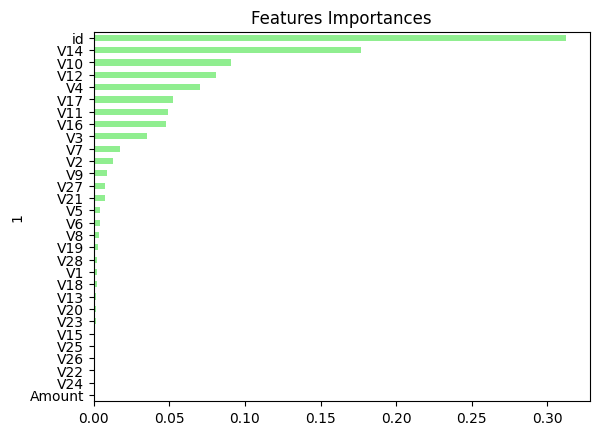

In [33]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [34]:
# KNN test
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [35]:
# Read the CSV file into a Spark DataFrame
KNN_df = spark.read.csv('creditcard_2023.csv', header=True, inferSchema=True)

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = KNN_df.toPandas()

# Display the first few rows of the Pandas DataFrame
pandas_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [36]:
# Split target column from dataset
y = pandas_df['Class']
X = pandas_df.drop(columns='Class')

In [37]:
# Preview the data
X[:5]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [38]:
# Print first five entries for target
y[:5]

,Class
0,0
1,0
2,0
3,0
4,0


In [39]:
# Preview the data
X.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [40]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
X_train.shape

(426472, 30)

In [42]:
X_test.shape

(142158, 30)

In [43]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Instantiate the model with k = 3 neighbours
model = KNeighborsClassifier(n_neighbors=3)

In [45]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [47]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[71077,     3],
       [   66, 71012]])

In [48]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       1.00      1.00      1.00     71078

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

